# Step 1: Find and download a dataset

The [Palmer penguins dataset](https://education.rstudio.com/blog/2020/07/palmerpenguins-cran/), which originated as an [`R` package](https://allisonhorst.github.io/palmerpenguins/), contains information on 344 penguins found across three islands on Antarctica's Palmer Archipelago. The penguins belong to one of three species. The provided variables allow for predicting the species based on each penguin's physical characteristics and location.

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns # to access the penguin dataset in Python

Load dataset via the `seaborn` package:

In [127]:
penguins_raw = sns.load_dataset("penguins")
penguins_raw.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Checking if there are at least 10 samples per dimension:

In [128]:
penguins_raw["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

Get proportion of each label (i.e. penguin species) ([source](https://stackoverflow.com/questions/50558458/pandas-get-frequency-of-item-occurrences-in-a-column-as-percentage))

In [129]:
penguins_raw["species"].value_counts(normalize=True) * 100

Adelie       44.186047
Gentoo       36.046512
Chinstrap    19.767442
Name: species, dtype: float64

Checking that there are in fact 344 penguin samples:

In [130]:
# shape of dataset
print("Rows/Samples:", penguins_raw.shape[0],
      "\nColumns/Variables:", penguins_raw.shape[1])

Rows/Samples: 344 
Columns/Variables: 7


# Step 2: Divide into a training set and a testing set

*Divide data into training and testing sets:*

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
# drop target variable and variable not being used (categorical)
X = penguins_raw.drop(["species"], axis=1)

# target variable
y = penguins_raw["species"]

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

*Are testing and training sets are balanced in terms of target classes?* Using `stratify` parameter ([source](https://campus.datacamp.com/courses/preprocessing-for-machine-learning-in-python/introduction-to-data-preprocessing?ex=9))

In [133]:
# species breakdown as % before setting "stratify" in train_test_split()
y_train.value_counts(normalize=True) * 100
# result: pretty ok

Adelie       42.635659
Gentoo       36.434109
Chinstrap    20.930233
Name: species, dtype: float64

In [134]:
# species breakdown as % before setting "stratify" in train_test_split()
y_test.value_counts(normalize=True) * 100
# result: not as ok

Adelie       48.837209
Gentoo       34.883721
Chinstrap    16.279070
Name: species, dtype: float64

In [135]:
# set "stratify" parameter (where y refers to the labels/target dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0) 

In [136]:
# species breakdown as % after setting "stratify" parameter
y_train.value_counts(normalize=True) * 100
# result: good

Adelie       44.186047
Gentoo       36.046512
Chinstrap    19.767442
Name: species, dtype: float64

In [137]:
# as % after setting "stratify" parameter
y_test.value_counts(normalize=True) * 100
# result: good

Adelie       44.186047
Gentoo       36.046512
Chinstrap    19.767442
Name: species, dtype: float64

In [138]:
# Training data (75%) dimensions 
print("X_train shape (rows, columns):", X_train.shape)
print("y_train shape:", y_train.shape)
# Testing data (25%) dimensions 
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape (rows, columns): (258, 6)
y_train shape: (258,)
X_test shape: (86, 6)
y_test shape: (86,)


# Step 3: Explore your training set

In [139]:
X_train.info() # gives variables, # of non-NA values, data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 286 to 295
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             258 non-null    object 
 1   bill_length_mm     257 non-null    float64
 2   bill_depth_mm      257 non-null    float64
 3   flipper_length_mm  257 non-null    float64
 4   body_mass_g        257 non-null    float64
 5   sex                250 non-null    object 
dtypes: float64(4), object(2)
memory usage: 14.1+ KB


In [140]:
# for reference, the number of missing values per variable
X_train.isnull().sum()

island               0
bill_length_mm       1
bill_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  8
dtype: int64

### See factors of each categorical variable:

In [141]:
# island breakdown
X_train["island"].value_counts(normalize=True) * 100

Biscoe       49.612403
Dream        35.271318
Torgersen    15.116279
Name: island, dtype: float64

In [142]:
# sex breakdown
X_train["sex"].value_counts(normalize=True) * 100

Female    52.4
Male      47.6
Name: sex, dtype: float64

### Statistical summary for numeric variables:

In [143]:
X_train.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,257.000000,257.000000,257.000000,257.000000
mean,43.852140,17.074319,200.914397,4183.463035
std,5.432275,1.923305,14.176085,803.136473
min,33.100000,13.100000,172.000000,2700.000000
25%,39.100000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4000.000000
75%,48.500000,18.600000,213.000000,4750.000000
max,58.000000,21.200000,231.000000,6300.000000


In [144]:
y_train.isnull().sum() # Any missing values in training set for target variable (y)? No

0

In [145]:
y_train.value_counts()

Adelie       114
Gentoo        93
Chinstrap     51
Name: species, dtype: int64

Summary of data exploration:

| | Variable | Data Type | No. of NA Values | Factors/Range |
| ------ | ------ | ------ | ------ | ------ |
| 01 | `island` | `string` | 0 | `Biscoe`, `Dream`, `Torgersen` |
| 02 | `bill_length_mm` | `float` | 1 | 33.1-58 mm |
| 03 | `bill_depth_mm` | `float` | 1 | 13.1-21.2 mm |
| 04 | `flipper_length_mm` | `float` | 1 | 172-231 mm |
| 05 | `body_mass_g` | `float` | 1 | 2,700-6,300 g |
| 06 | `sex` | `string` | 8 | `Female`, `Male` |
| 07| **Target:** `species` | `string` | 0 | `Adelie`, `Gentoo`, `Chinstrap`|

# Step 4: Data cleaning
*Address any missing values in your training set. Include the code in your Jupyter notebook and create a second, cleaned, version of your dataset. Then apply the same procedure to your test set (if you are putting in replacement values use `IMPUTER` in `scikit-learn`).*

### Missing data

In [146]:
# show rows with missing data
X_train_null = pd.DataFrame(X_train, columns = X.columns)
X_train_null = X_train_null[X_train_null.isnull().any(axis=1)]
X_train_null

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
286,Biscoe,46.2,14.4,214.0,4650.0,NaN
11,Torgersen,37.8,17.3,180.0,3700.0,NaN
324,Biscoe,47.3,13.8,216.0,4725.0,NaN
3,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Torgersen,34.1,18.1,193.0,3475.0,NaN
10,Torgersen,37.8,17.1,186.0,3300.0,NaN
336,Biscoe,44.5,15.7,217.0,4875.0,NaN
246,Biscoe,44.5,14.3,216.0,4100.0,NaN


Result: Only a Torgersen penguin is missing numeric data so just remove that row.

In [147]:
# fill in missing values using median calculations
#from sklearn.impute import SimpleImputer
#X_train_num = X_train.drop(["island", "sex"], axis=1)
#imputer_med = SimpleImputer(missing_values=np.nan, strategy="median")
#imputer_med.fit(X_train_num)
#SimpleImputer()
#X_train_num = imputer_med.transform(X_train_num)
#X_train_num = pd.DataFrame(X_train_num, columns=X_train_num.columns)

X_train = X_train.dropna(subset=["bill_length_mm"], axis=0)

In [148]:
# replay
X_train_null = pd.DataFrame(X_train, columns = X.columns)
X_train_null = X_train_null[X_train_null.isnull().any(axis=1)]
X_train_null

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
286,Biscoe,46.2,14.4,214.0,4650.0,NaN
11,Torgersen,37.8,17.3,180.0,3700.0,NaN
324,Biscoe,47.3,13.8,216.0,4725.0,NaN
8,Torgersen,34.1,18.1,193.0,3475.0,NaN
10,Torgersen,37.8,17.1,186.0,3300.0,NaN
336,Biscoe,44.5,15.7,217.0,4875.0,NaN
246,Biscoe,44.5,14.3,216.0,4100.0,NaN


Now only the categorical variable `sex` has missing values.

In [149]:
# Fill in missing values using most frequent class
# source: https://jamesrledoux.com/code/imputation

X_train = X_train.apply(lambda X_train: X_train.fillna(X_train.value_counts().index[0]))
X_train

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
286,Biscoe,46.2,14.4,214.0,4650.0,Female
110,Biscoe,38.1,16.5,198.0,3825.0,Female
63,Biscoe,41.1,18.2,192.0,4050.0,Male
91,Dream,41.1,18.1,205.0,4300.0,Male
329,Biscoe,48.1,15.1,209.0,5500.0,Male
...,...,...,...,...,...,...
246,Biscoe,44.5,14.3,216.0,4100.0,Female
320,Biscoe,48.5,15.0,219.0,4850.0,Female
280,Biscoe,45.3,13.8,208.0,4200.0,Female
182,Dream,40.9,16.6,187.0,3200.0,Female


### Encoding binary values for `sex` feature

In [150]:
from sklearn.preprocessing import LabelEncoder

In [151]:
le = LabelEncoder()
X_train["sex"] = le.fit_transform(X_train["sex"])
X_train # 0 = F, 1 = M

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
286,Biscoe,46.2,14.4,214.0,4650.0,0
110,Biscoe,38.1,16.5,198.0,3825.0,0
63,Biscoe,41.1,18.2,192.0,4050.0,1
91,Dream,41.1,18.1,205.0,4300.0,1
329,Biscoe,48.1,15.1,209.0,5500.0,1
...,...,...,...,...,...,...
246,Biscoe,44.5,14.3,216.0,4100.0,0
320,Biscoe,48.5,15.0,219.0,4850.0,0
280,Biscoe,45.3,13.8,208.0,4200.0,0
182,Dream,40.9,16.6,187.0,3200.0,0


### One-hot encoding

In [153]:
# for island feature
X_train_enc = pd.get_dummies(X_train)
X_train_enc

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
286,46.2,14.4,214.0,4650.0,0,1,0,0
110,38.1,16.5,198.0,3825.0,0,1,0,0
63,41.1,18.2,192.0,4050.0,1,1,0,0
91,41.1,18.1,205.0,4300.0,1,0,1,0
329,48.1,15.1,209.0,5500.0,1,1,0,0
...,...,...,...,...,...,...,...,...
246,44.5,14.3,216.0,4100.0,0,1,0,0
320,48.5,15.0,219.0,4850.0,0,1,0,0
280,45.3,13.8,208.0,4200.0,0,1,0,0
182,40.9,16.6,187.0,3200.0,0,0,1,0


In [155]:
# for target feature (species)
y_train_enc = pd.get_dummies(y_train)
y_train_enc

,Adelie,Chinstrap,Gentoo
286,0,0,1
110,1,0,0
63,1,0,0
91,1,0,0
329,0,0,1
...,...,...,...
246,0,0,1
320,0,0,1
280,0,0,1
182,0,1,0


# Step 5: Visualize the data in your training set

In [90]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

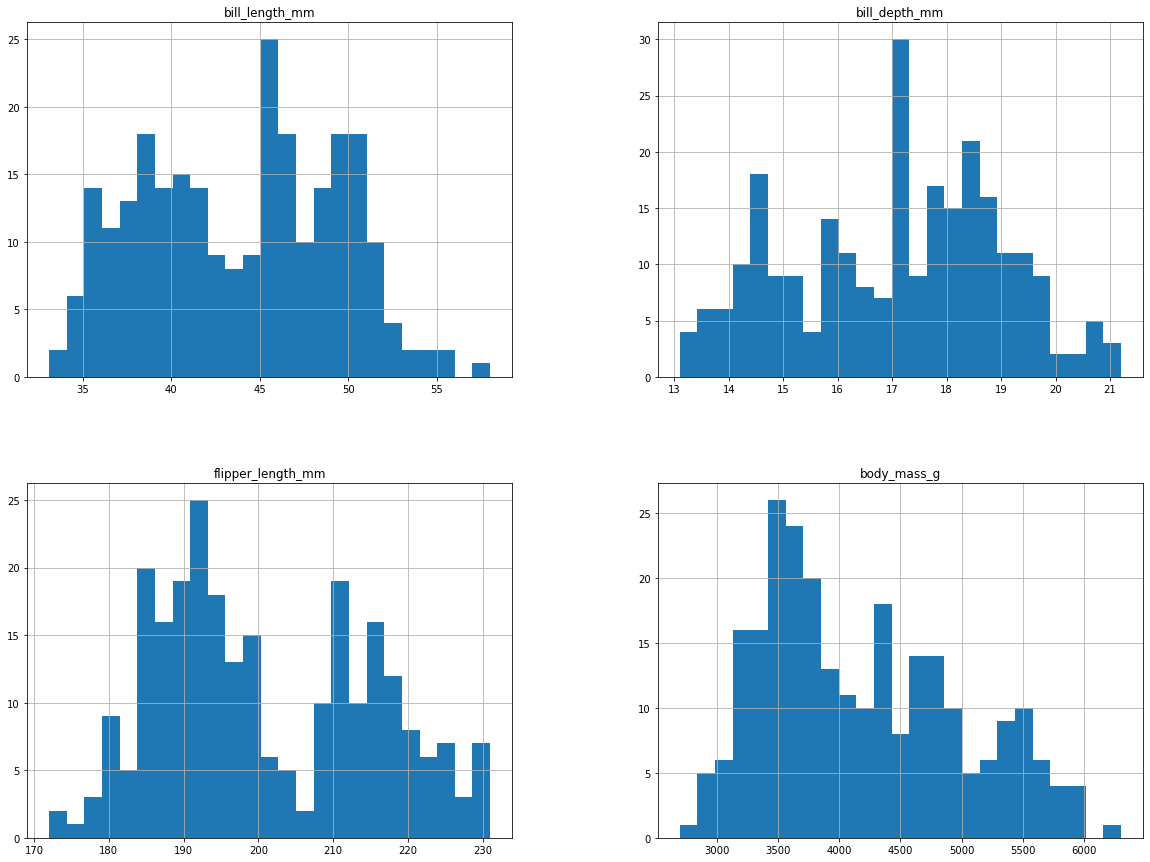

In [96]:
training = pd.concat([X_train, y_train], axis=1)
training.hist(bins=25, figsize=(20,15))
plt.show()

In [ ]:
attributes = ["MEDV", "LSTAT", "RM", "AGE"]
scatter_matrix(boston_pd[attributes], figsize = (12,8))

In [17]:
corr_matrix = X_train.corr()
corr_matrix["MEDV"].sort_values(ascending = False)

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

# Step 6: Apply transformations to your data. 
In your Jupyter notebook apply, squaring (\*\*2), cubing (\*\*\*3), logarithmic (`np.log`), and exponentials (`np.exp`) transformations to two features in your dataset. Plot the histograms and scatter matrices of the resultant data.